In [1]:
import sys
sys.path.append("DYlib")

In [2]:
import samna
import samna.dynapse1 as dyn1

from dynapse1constants import *
import dynapse1utils as ut

import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# open without GUI (for board connected to the remote machine)
model, _ = ut.open_dynapse1(gui=False, sender_port=ut.free_port(), receiver_port=ut.free_port(), select_device=True)

[0]:  Bus 1 Device 9 Dynapse1DevKit serial_number 00000020
[1]:  Bus 1 Device 125 Dynapse1DevKit serial_number 00000030
[2]:  Bus 1 Device 4 Dynapse1DevKit serial_number 00000092
[3]:  Bus 1 Device 123 Dynapse1DevKit serial_number 00000000
Sender port: tcp://0.0.0.0:34695
Receiver port: tcp://0.0.0.0:46479
Opened device name: Dynapse1DevKit
SamnaNode ID: 1
PythonNode ID: 2
0 Dynapse1Wrapper created! libcaer init...
Clearing chip 0... DONE.
Clearing chip 1... DONE.
Clearing chip 2... DONE.
Clearing chip 3... DONE.


Applying Pre-made Demo Configuration for Chip 1 Core 0

In [4]:
ut.set_parameters_in_txt_file(model, "DYlib/working_best_C1c0_modified.txt")

## Monitor single neurons with oscilloscope (in Zemo Only)

First, we make the board output the membrane voltage of a specific neuron to the output socket.

**Note:** we specify `chip_id` __[0..3]__ and `neuron_id` __[0..1023]__, 

#### the oscilloscope probe should be connected to the socket of the  **chip 1 - core 0** (C1c0).

In [5]:
chip_id = 1
neuron_id = 3

SPCM_probe_id=0

In [6]:
api  =  model.get_dynapse1_api()
api.monitor_neuron(chip_id, neuron_id)

Specifying the neurons we are interested in

IDs go as triplets (chip_id, core_id, n_id)

In [7]:
graph, filter_node, sink_node = ut.create_neuron_select_graph(model, np.array([[chip_id, 0, neuron_id]]))
# Never forget to start the graph!
graph.start()

True

526


Text(0, 0.5, 'neuron id')

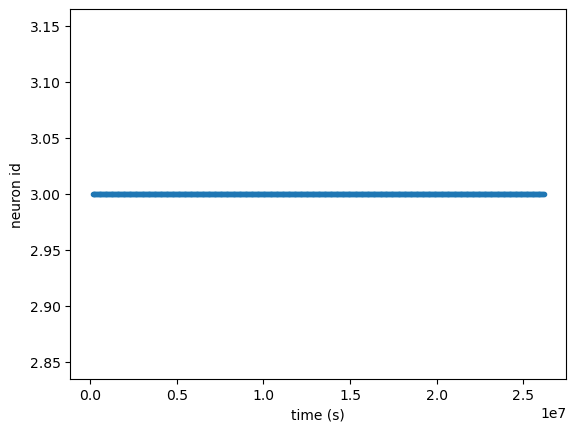

In [8]:
evts = sink_node.get_events()
print(len(evts))
evts_n = np.array([[evt.timestamp, evt.neuron_id] for evt in evts])
plt.plot(evts_n[:,0], evts_n[:,1], '.')
plt.xlabel("time (s)")
plt.ylabel("neuron id")

#### Oscilloscope on Zemo access

Using the `PySpcmScope` library, it is possible to get the traces directly from Zemo. 
There are two data acquisition methods called `single_shot` and `single_fifo_shot`. `single_shot` is used in the following. 
Please refer to [demo notebook](demo.ipynb) for the full class reference and examples.
 



`single_shot` function, as the name implies, capture the data in a single brust and save that into the card memory-buffer. The data acquisition itself works as follows and can be called as many times with very low down-time:

In [ ]:
# from py_spcm_scope import PySpecScope
# my_scope = PySpecScope()
# my_scope.single_shot() 
%tb

Found: M2i.3132-Exp sn 05474
Init successful
set input range to +/- 1000 mV
ContBuf length: 0
Using buffer allocated by user program
... Timeout


SystemExit: 1

This captures the `200` KiloSamples of the data with a `100` KiloS/sec sampling rate i.e. you get a 2 sec long snippet of your data. Then you can extract the data either from single channel (depending on where you have connected) or from all the channels as follows 



In [15]:
num_samples=200 #in Kilo Samples
sampling_rate=100 #in KHZ

abc=my_scope.get_waveform_single(CH_ID=SPCM_probe_id)
time=np.linspace(0.0, num_samples/(sampling_rate), num=np.shape(abc)[0], endpoint=True)

AttributeError: 'PySpecScope' object has no attribute 'pbyData'

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,8))
plt.plot(time,abc)

NameError: name 'abc' is not defined

<Figure size 1700x800 with 0 Axes>

In [ ]:
ut.close_dynapse1(model)